# Classification Model
* <b>File Name</b>                          : Reference_implementation
* <b>Date of creation(dd-mm-yyyy)</b>       : 06-03-2022
* <b>Author Name/Dept</b>                   : AIShield
* <b>Organization</b>                       : BGSW
* <b>Description</b>                        : Source Code of reference implementation
* <b>Copyright</b>                          : Copyright 2022 Bosch Global Software Technologies Private Limited. All Rights Reserved.

### Metadata
* Dataset: mnist
* Size of training set: 54,000
* Size of testing set : 10,000
* Size of training set: 6,000
* Number of class : 10
* Original Model: CNN

### Outcomes
* Accuracy of model: 0.99

# Prerequisite for reference implementation 

1. Jupyter Notebook
2. Python 3.X
3. matplotlib 3.5.1
4. numpy 1.22.3
5. opencv-python 4.5.5.64
6. pandas 1.4.1
7. scikit-learn 1.0.2
8. tensorflow 2.3.0
9. zipp 3.7.0

# 1.0 Import Libraries

In [1]:
"""
Description: Import libraries
"""
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, optimizers , Sequential
from sklearn.model_selection import train_test_split
import zipfile 
import pandas as pd
import cv2
import os
import random
import requests
import json
import time
import shutil

C:\Users\tnq1kor\Anaconda3\envs\checktensorflow\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.0.0)/charset_normalizer (2.0.6) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


# 2.0 Data Loading and Preprocessing

In [20]:
'''
Description : Loading mnist dataset
'''
(X_train,y_train),(X_test,y_test)=datasets.mnist.load_data()

In [21]:
'''
Description : Splitting data for validation
'''
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,stratify = y_train,test_size = 0.1,random_state = 42)

In [22]:
'''
Description : Check size of dataset
'''
print("shape of x_train: ",X_train.shape)
print("shape of y_train: {}".format(y_train.shape))
print(f'shape of x_test: {X_test.shape}')
print(f'shape of y_test: {y_test.shape}')
print(f'shape of x_val: {X_val.shape}')
print(f'shape of y_val: {y_val.shape}')

shape of x_train:  (54000, 28, 28)
shape of y_train: (54000,)
shape of x_test: (10000, 28, 28)
shape of y_test: (10000,)
shape of x_val: (6000, 28, 28)
shape of y_val: (6000,)


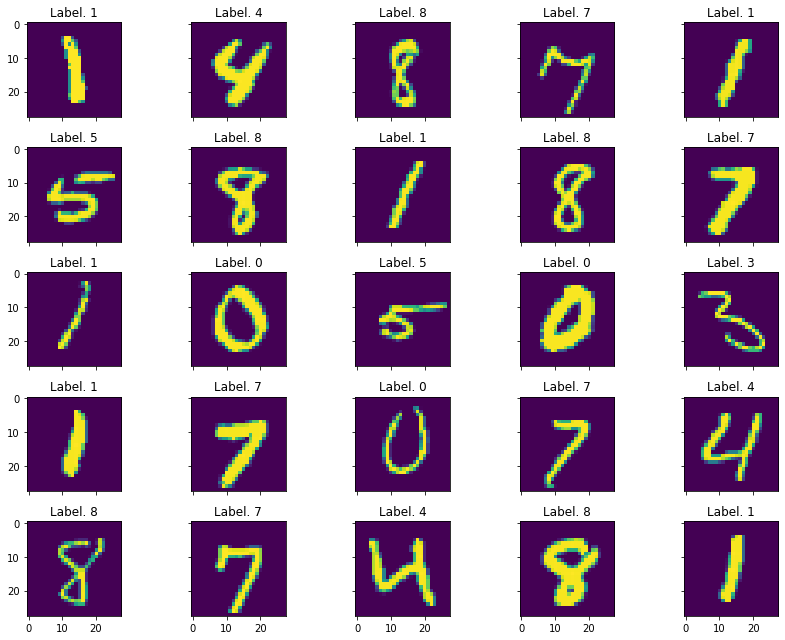

In [5]:
'''
Description: Visualize few random data sample
'''
rows=5

random_indices=random.sample(range(X_train.shape[0]),rows*rows)
sample_images=X_train[random_indices,:]
sample_labels=y_train[random_indices]

fig,axs=plt.subplots(nrows=rows,ncols=rows,figsize=(12,9),sharex=True,sharey=True)
for i in range(rows*rows):
    subplot_row=i // rows
    subplot_col=i % rows
    axs[subplot_row,subplot_col].imshow(sample_images[i,:])
    axs[subplot_row,subplot_col].set_title("Label. %d" % sample_labels[i])
plt.tight_layout()

In [4]:
'''
Description : Set num_classes and input shape 
'''
img_row,img_col,channel=28,28,1
num_classes=10
input_shape=(img_row,img_col,channel)

In [25]:
"""
Description: Normalizing and reshaping the data
"""
X_train = X_train.reshape(-1,*input_shape)/255.0
X_val =  X_val.reshape(-1,*input_shape)/255.0
X_test =  X_test.reshape(-1,*input_shape)/255.0

In [26]:
"""
Description : Convert label to one hot encoder
"""
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

# 3.0 Model Development and Training

In [9]:
def make_directory(directory):
    """
    create directory

    Parameters
    ----------
    directorys : list containing the directorys path to create 
    Returns
    -------
    None.

    """
    for d in directory:
        if os.path.isdir(d):
            print("directory {} already exist".format(d))
        if os.path.isdir(d)==False:
            os.mkdir(path=d)
            print("directory {} created successfully".format(d))

In [10]:
def delete_directory(directorys):
    """
    delete directory 

    Parameters
    ----------
    directorys : list containing the directorys to deleate along with all the files

    Returns
    -------
    None.

    """
    if len(directorys)>=1:
        for d in directorys:
            if os.path.isdir(d):
                try:
                    if os.path.isfile(d):
                        os.remove(path=d)
                    else:
                        shutil.rmtree(path=d)
                        print("Removed: {}".format(d))
                except:
                    print("Failed to removed: {}".format(d))
            else:
                print("Failed to removed: {}".format(d))
                

In [11]:
def make_archive(base_name,root_dir,zip_format='zip'):
    """
    created zip for given folder

    Parameters
    ----------
    base_name : name of zip file
    root_dir : directory to archive/zip
    zip_format : zip or tar 
        DESCRIPTION. The default is 'zip'.

    Returns
    -------
    None.

    """
    shutil.make_archive(base_name=base_name, format=zip_format, root_dir=root_dir)
    

In [12]:
"Description : Create data, model and label folder"
data_path=os.path.join(os.getcwd(),"data")
model_path=os.path.join(os.getcwd(),"model")
label_path=os.path.join(os.getcwd(),"label")
zip_path=os.path.join(os.getcwd(),"zip")
pyc_model_path=os.path.join(os.getcwd(),"pyc_model")
#deleting folder
delete_directory(directorys=[data_path,model_path,label_path,zip_path,pyc_model_path])

#creating folder
make_directory([data_path,model_path,label_path,zip_path,pyc_model_path])

Failed to removed: C:\Users\tnq1kor\Documents\01_AISHIELD\21_TrialDemo\IC\data
Failed to removed: C:\Users\tnq1kor\Documents\01_AISHIELD\21_TrialDemo\IC\model
Failed to removed: C:\Users\tnq1kor\Documents\01_AISHIELD\21_TrialDemo\IC\label
Failed to removed: C:\Users\tnq1kor\Documents\01_AISHIELD\21_TrialDemo\IC\zip
Failed to removed: C:\Users\tnq1kor\Documents\01_AISHIELD\21_TrialDemo\IC\pyc_model
directory C:\Users\tnq1kor\Documents\01_AISHIELD\21_TrialDemo\IC\data created successfully
directory C:\Users\tnq1kor\Documents\01_AISHIELD\21_TrialDemo\IC\model created successfully
directory C:\Users\tnq1kor\Documents\01_AISHIELD\21_TrialDemo\IC\label created successfully
directory C:\Users\tnq1kor\Documents\01_AISHIELD\21_TrialDemo\IC\zip created successfully
directory C:\Users\tnq1kor\Documents\01_AISHIELD\21_TrialDemo\IC\pyc_model created successfully


In [13]:
"""
Description: Create model architecture
"""
model = Sequential([
    layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPool2D(strides=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  
])
#Compile model
model.compile(optimizer=optimizers.Adam(learning_rate=1e-3), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [14]:
"""
Description: Model summary
"""
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [15]:
"""
Description: Model architecture plot
"""
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [16]:
"""
Description : Callbacks
"""
# Checkpoint
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(model_path,'mnist_model.h5'),monitor='val_loss',verbose=1,save_best_only=True,mode='auto')
# Early stopper
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0,patience=3,mode='min')

callbacks = [early_stop, checkpoint]

In [17]:
"""
Description: Training model
"""
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),epochs = 5, batch_size=64, verbose = 1 , callbacks = callbacks)

Epoch 1/5
844/844 [==============================] - ETA: 0s - loss: 0.2333 - accuracy: 0.9278
Epoch 1: val_loss improved from inf to 0.04237, saving model to C:\Users\tnq1kor\Documents\01_AISHIELD\21_TrialDemo\IC\model\mnist_model.h5
844/844 [==============================] - 16s 13ms/step - loss: 0.2333 - accuracy: 0.9278 - val_loss: 0.0424 - val_accuracy: 0.9855
Epoch 2/5
841/844 [============================>.] - ETA: 0s - loss: 0.0826 - accuracy: 0.9761
Epoch 2: val_loss improved from 0.04237 to 0.03064, saving model to C:\Users\tnq1kor\Documents\01_AISHIELD\21_TrialDemo\IC\model\mnist_model.h5
844/844 [==============================] - 11s 13ms/step - loss: 0.0826 - accuracy: 0.9761 - val_loss: 0.0306 - val_accuracy: 0.9905
Epoch 3/5
843/844 [============================>.] - ETA: 0s - loss: 0.0606 - accuracy: 0.9826
Epoch 3: val_loss improved from 0.03064 to 0.02418, saving model to C:\Users\tnq1kor\Documents\01_AISHIELD\21_TrialDemo\IC\model\mnist_model.h5
844/844 [============

In [27]:
"""
Description: Evaluate trained model
"""
loss,accuracy=model.evaluate(X_test, y_test)
print("* Loss: {} \n* Accuracy: {}".format(loss,accuracy))

313/313 [==============================] - 2s 5ms/step - loss: 3.7409 - accuracy: 0.9931
* Loss: 3.7408690452575684 
* Accuracy: 0.9930999875068665


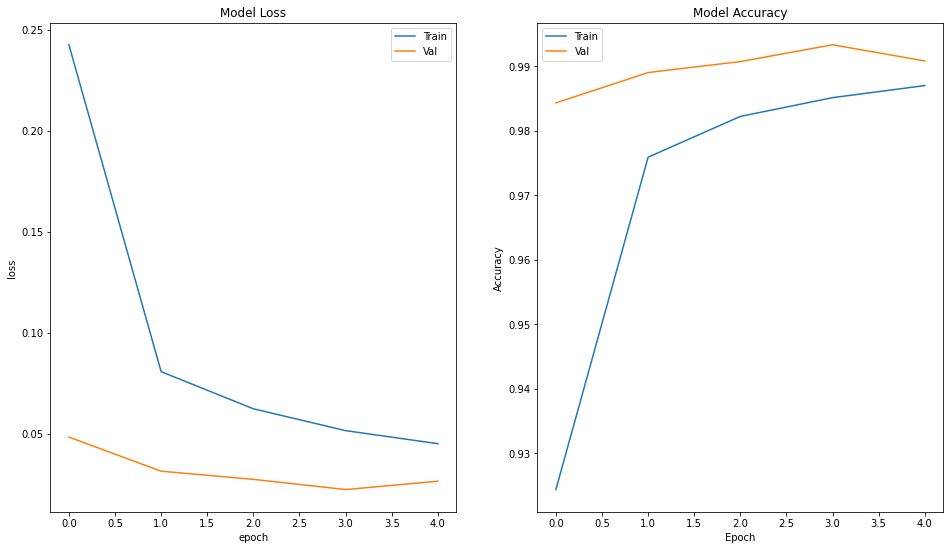

In [19]:
"""
Description: Visualize model learning 
"""
fig, ax = plt.subplots(1, 2, figsize = (16, 9))

ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Model Loss')
ax[0].legend(['Train', 'Val'], loc = 'best')
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epoch')

ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])
ax[1].set_title('Model Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc = 'best')

plt.show()

# 4.0 Prepare Data , Model and Label

In [20]:
"""
Description: Save data and label
"""
label=pd.DataFrame()
img_name = []
img_label = [] 
  
for i in range(X_val.shape[0]):
    cv2.imwrite(os.path.join(data_path,str(i)+".jpg") ,X_val[i]*255.0) # don't use plt.imread otheriwse while loading the saved images , and passing to model there is accuarcy drop 
    img_name.append(str(i)+".jpg")
    img_label.append(y_val[i])
label['image'] = img_name
label["label"] = np.array(img_label)

#write orig_label dataframe
label.to_csv(os.path.join(label_path,"label.csv"),index=False)

In [21]:
"""
Description: Zip data
"""
make_archive(base_name=os.path.join(zip_path,"data"),root_dir=data_path,zip_format='zip')

In [22]:
"""
Description: Zip label
"""
make_archive(base_name=os.path.join(zip_path,"label"),root_dir=label_path,zip_format='zip')

# 4.1 Convert python script (.py) to (.pyc)

In [23]:
"""
Description: save weight of model
"""
model.save_weights(os.path.join(pyc_model_path,"model_weight.h5"))

In [24]:
python_code='''
#import library
import numpy as np
import tensorflow as tf

#define class
class BaseModel():
    """
    class for base model
    """
    def __init__(self,input_shape=(28,28,1),num_classes=10,model_weight_path="model_weight.h5"):
        """
        constructor for class

        Parameters
        ----------
        input_shape : TYPE, optional
            DESCRIPTION. The default is (28,28,1).
        num_classes : TYPE, optional
            DESCRIPTION. The default is 10.
        model_weight_path : string, optional
            DESCRIPTION. the relative path to model weight

        Returns
        -------
        None.

        """
        self.input_shape=input_shape
        self.num_classes=num_classes
        self.model_weight_path=model_weight_path
        

    def cnn_model(self,input_shape,num_classes):
        """
        model architecture

        Parameters
        ----------
        input_shape : string
            DESCRIPTION.input_shape for model e.g (28,28,1)
        num_classes : string
            DESCRIPTION.number of class e.g 10

        Returns
        -------
        model : model
            DESCRIPTION.

        """
        #create sequential model

        model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
            tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
            tf.keras.layers.MaxPool2D(),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
            tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
            tf.keras.layers.MaxPool2D(strides=(2,2)),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(num_classes, activation='softmax')   # used softmax , so set from_logits = False in cross entropy loss
        ])

        
        return model
    
    def predict(self,X):
        """
        predict for given data

        Parameters
        ----------
        X : numpy array 
            DESCRIPTION.

        Returns
        -------
        pred : numpy array
            DESCRIPTION.

        """
        model=self.cnn_model(input_shape=self.input_shape,num_classes=self.num_classes)
        model.load_weights(self.model_weight_path)
        
        pred=np.argmax(model.predict(X),axis=-1)
        return pred '''

In [1]:
# Writing to file
with open("base_model.py", "w") as file:
    # Writing data to a file
    file.writelines(python_code)

NameError: name 'python_code' is not defined

In [8]:
"""
Description: Create model architecture
"""
model = Sequential([
    layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPool2D(strides=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  
])
#Compile model
# model.compile(optimizer=optimizers.Adam(learning_rate=1e-3), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.load_weights('C:/Users/tnq1kor/Documents/01_AISHIELD/14_Code/ais/ais_core/image_classification/model_exploration/src/In/Model/model_weight.h5')

In [26]:
"""
Description: function to create .pyc file
"""
import py_compile
py_compile.compile(file='base_model.py',cfile=os.path.join(pyc_model_path,'base_model.pyc'))

'D:\\Projects\\AIShield_Minerva\\Codes\\IM4_5_MVP_AIS\\reference\\reference_implementation\\pyc_model\\base_model.pyc'

* .pyc file with name base_model.pyc will get created
* delete .py file and still import and other function will work
* while AIShield API call , inplace of model.h5 file you can zip .pyc and model weight which will provide security to internal architecture

In [27]:
"""
Description: check import from .pyc file
"""
from pyc_model.base_model import BaseModel
base_model=BaseModel(model_weight_path=r"pyc_model/model_weight.h5")

[1]


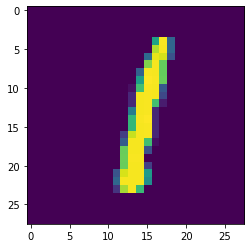

In [28]:
"""
Description : getting prediction from function imported from .pyc file
"""
print(base_model.predict(X_val[:1]))
plt.imshow(X_val[0])

In [29]:
"""
Description: Zip model
"""
model_encryption=1 #0 if model is uploaded directly as a zip, 1 if model is encryted as .pyc and uploaded as a zip
if os.path.isfile(os.path.join(zip_path,"model.zip")):
    delete_directory(directorys=[os.path.join(zip_path,"model.zip")])
if model_encryption:
    make_archive(base_name=os.path.join(zip_path,"model"),root_dir=pyc_model_path,zip_format='zip')
else:
    make_archive(base_name=os.path.join(zip_path,"model"),root_dir=model_path,zip_format='zip')

# 5.0 AIShield API Call

In [30]:
"""
Description: AIShield API URL and subscription key
""" 
# url="https://apim-prod-ais-01.azure-api.net/trial/ic/ais/ImageClassification/VulnerabiltyReport"
url="http://20.79.233.37:5015/api/ais/ImageClassification/VulnerabiltyReport"
headers={'Cache-Control': 'no-cache',
'Ocp-Apim-Subscription-Key': "646b6b8560a042c49d3af308738d6f9c"
}

In [31]:
"""
Description: Files path
"""
data_path=os.path.join(zip_path,'data.zip') #full path of data zip
label_path=os.path.join(zip_path,'label.zip') #full path of label zip
model_path=os.path.join(zip_path,'model.zip') #full path of model zip

In [32]:
"""
Description: Payload for AIShield VulnerabilityReport api call
"""
payload={}
payload['input_dimensions']=str(input_shape)
payload['number_of_classes']=str(num_classes)
payload['attack_type']="blackbox"
payload['number_of_attack_queries']=50000
payload['model_framework']='tensorflow'
payload['vulnerability_threshold']="0"
payload['normalize_data']="yes"
payload['defense_bestonly']="no"
payload['encryption_strategy']= model_encryption
payload['model_api_details']="no"
payload['use_model_api'] = "no"

In [33]:
"""
Description: Files for AIShield VulnerabilityReport api call
"""
model_name=os.path.split(model_path)[1] #model file name
data_name=os.path.split(data_path)[1] #data file name
label_name=os.path.split(label_path)[1] #label file name

files=[
  ('data_zip',(data_name,open(data_path,'rb'),'application/x-zip-compressed')),
  ('model_zip',(model_name,open(model_path,'rb'),'application/x-zip-compressed')),
  ('label_zip',(label_name,open(label_path,'rb'),'application/x-zip-compressed'))
  ]

In [40]:
"""
Description: Hit AIShield VulnerabilityReport api
"""
new_request = requests.request(method="POST", url=url, params=payload, files=files,headers=headers)
new_request=json.loads(new_request.text)
for k, v in new_request.items():
    print("* {} : {}".format(k,v))

* attack_type : blackbox
* defense_bestonly : no
* encryption_strategy : 1
* input_dimensions : (28, 28, 1)
* job_id : gAAAAABi6QgjVVYd1QrFS0XR9OhOPa2PZp8z6svgogdSE9n0WcaS8dUEEX74CldyO6PPmALYBWTSfKl0Wp4xPkE9DnHqcsp9oQ==
* model_framework : tensorflow
* monitor_link : https://aishieldwebmonitor.z1.web.core.windows.net/?type=ImageClassification&jobid=gAAAAABi6QgjVVYd1QrFS0XR9OhOPa2PZp8z6svgogdSE9n0WcaS8dUEEX74CldyO6PPmALYBWTSfKl0Wp4xPkE9DnHqcsp9oQ%3D%3D
* normalize_data : yes
* number_of_attack_queries : 50000
* number_of_classes : 10
* use_model_api : no
* vulnerability_threshold : 0.0


In [41]:
"""
Description: Get job id from api response
"""
job_id=new_request['job_id']
print(f"Job id : {job_id}")

Job id : gAAAAABi6QgjVVYd1QrFS0XR9OhOPa2PZp8z6svgogdSE9n0WcaS8dUEEX74CldyO6PPmALYBWTSfKl0Wp4xPkE9DnHqcsp9oQ==


In [42]:
"""
Description: Query GetProcessDetail api and Monitor progress for job id
"""
job_status_url=url[:-18]+"JobStatusDetailed?JobID=" +job_id

#status dictionary
status_dictionary={
 'ModelExploration_Status': 'na',
 'SanityCheck_Status': 'na',
 'QueryGenerator_Status': 'na',
 'VunerabilityEngine_Status': 'na', 
 'DefenseReport_Status': 'na',
 'IntegratedModelGenerator_Status':'na',

}
while(True):
    time.sleep(5) 
    job_status_response = requests.request("GET", job_status_url, params={},headers=headers)

    job_status_payload=json.loads(job_status_response.text)
    failing_key='ModelExploration_Status'
    for key in status_dictionary.keys():
        if status_dictionary[key]=='na':
            if job_status_payload[key]=='completed' or job_status_payload[key]=='passed':
                status_dictionary[key]=job_status_payload[key]
                print(str(key), ":",status_dictionary[key])
            elif job_status_payload[key]=='failed':
                failing_key=key
                status_dictionary[key]=job_status_payload[key]
                print(str(key), ":",status_dictionary[key])

    if status_dictionary[failing_key]=='failed':
        break

    if status_dictionary['VunerabilityEngine_Status']=='passed' or status_dictionary['VunerabilityEngine_Status']=='completed' and job_status_payload['CurrentStatus']=="Defense generation is not triggered" :
        print("\n Vulnerability score {} failed to cross vulnerability threshoold of {}".format(job_status_payload['VulnerabiltyScore'],job_meta_data['vulnerability_threshold']))
        break
    if job_status_payload['IntegratedModelGenerator_Status']=='completed':
        break

ModelExploration_Status : failed


In [43]:
"""Description: Response from GetProcessDetail api
"""
for k, v in job_status_payload.items():
    print("* {} : {}".format(k,v))

* CreatedTimestamp : Tue, 02 Aug 2022 11:19:00 GMT
* CurrentStatus : Model exploration failed
* DefenseModelAccuracyAttackData : None
* DefenseReport_Status : None
* DefenseReport_TimeTaken : None
* IntegratedModelGenerator_Status : None
* IntegratedModelGenerator_TimeTaken : None
* JobID : gAAAAABi6QgjVVYd1QrFS0XR9OhOPa2PZp8z6svgogdSE9n0WcaS8dUEEX74CldyO6PPmALYBWTSfKl0Wp4xPkE9DnHqcsp9oQ==
* LastCompletedWorkflow : model_exploration
* ModelExploration_Status : failed
* ModelExploration_TimeTaken : None
* ModifiedTimestamp : Tue, 02 Aug 2022 11:19:14 GMT
* OriginalModelAccuracy : None
* QueryGenerator_Status : None
* QueryGenerator_Timetaken : None
* SanityCheck_Remarks : None
* SanityCheck_Status : None
* StolenModelAccuracyAttackData : None
* StolenModelAccuracyOrgData : None
* VulnerabiltyScore : None
* VunerabilityEngine_Status : None
* VunerabilityEngine_TimeTaken : None


In [38]:
"""Description: API to Get Job Details
"""
url_meta = url[:-18] + "/JobDetail?JobID=" + job_id

response = requests.request("GET", url_meta, headers=headers)

print(response.text)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>404 Not Found</title>
<h1>Not Found</h1>
<p>The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.</p>



In [39]:
"""Description: API to Get Report for given Job Details
"""
url_report = url[:-18]+"/GetReport?JobID=" + job_id + "&ReportType=defense&FileFormat=1"

response = requests.request("GET", url_report, headers=headers)

print(response.text)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>404 Not Found</title>
<h1>Not Found</h1>
<p>The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.</p>

